In [1]:
from types import SimpleNamespace
import time
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm
import math
from math import log
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from numpy import array
from scipy import optimize,arange

%matplotlib inline
from matplotlib.widgets import Slider, Button
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Cournot competition

- We consider a market with two firms (firm 1 and firm 2). They produce a homogenous good.
- They choose simultaneously what quantity to produce each. We note this as $q_1$ and $q_2$. The total quantity in the market is then given as $Q=q_1+q_2$.
- The market price is decreasing in quantity and is given as: $P(Q)=a-Q$.
- Both firms have the same marginal cost c, with $0 \le c<a$, and no fixed cost.
- The firms wish to maximize profits: ${\pi}_i(q_i,q_j)=P(q_i+q_j)q_i-cq_i$ 
- or: ${\pi_1}(q_1,q_2)=(a-q_1-q_2-c)q_1$ and ${\pi_2}(q_1,q_2)=(a-q_1-q_2-c)q_2$
- The solutions are best-response functions in a Nash Equilibrium where firm 1 is choosing the best response to firm 2 and vice versa.

Shown more extensively, these are the profit functions of each firm:

$$ 
π_1 (q_1 ,q_2 ) = (a - q_1 - q_2 - c)q_1 → q_1 = \left(\frac{a - q_2 -c}{2}\right)
$$
$$ 
π_2 (q_1 ,q_2 ) = (a - q_1 - q_2 - c)q_2 →  q_2 = \left(\frac{a - q_1 -c}{2}\right)
$$

By taking the first-order derivative with respect to $q_1$ and $q_2$, we obtain the following equations:

$$ 
a - 2q_1 - q_2 - c = 0
$$
$$
a - 2q_2 - q_1 - c = 0
$$

and the Best-Response functions for each firm. In the equlibrium we illustrate the best-response quantities with a *.

$$ q_1^* = \left(\frac{a - q_2^*}{2}\right) $$

$$ q_2^* = \left(\frac{a - q_1^*}{2}\right) $$

In the Nash equlibrium, the optimal output level of both firms is given by:

$$ q_1^* = q_2^* = \left(\frac{a - c}{3}\right) $$

In the equlibrium, the optimal quantity, price and profits are the following:

$$ Q = 2 \left(\frac{a - c}{3}\right) $$

$$ P = a - 2 \left(\frac{a - c}{3}\right) $$

$$ π_1 (q_1^* ,q_2^* ) = P(Q^*)q_1^* - cq_1^* = \left(\frac{a + 2c}{3}\right) - c\left(\frac{a - c}{3}\right) $$

$$ = \left(\frac{a - c}{3}\right)^2 $$

In [2]:
#defining variables
Q=sm.symbols("Q")
q1=sm.symbols("q_1") 
q2=sm.symbols("q_2")
q1_star=sm.symbols("q_1^*") 
q2_star=sm.symbols("q_2^*")
qi=sm.symbols("q_i") 
qj=sm.symbols("q_j")
P=sm.symbols("P")
pi_1=sm.symbols("\pi_1")
pi_2=sm.symbols("\pi_2")

#defining paraameters
a=sm.symbols("a")
c=sm.symbols("c")


# Analytical solution

To find the analytical solution, we find the derivative for each profit function as the firms wish to maximize profits.

Solve in **five steps**:

1. **Take the derivative** wrt. $q_1$
2. **Isolate** $q_2$ from the foc for firm 1
3. **Substitute** in $q_2$ for firm 2
4. **Solve the FOC** for $q_1$
5. **substitute** to find $q_2$

In [3]:
#defining functions
profit_1=(a-q1-q2-c)*q1
profit_2=(a-q1-q2-c)*q2

In [4]:
#take derivatives
foc_1 = sm.diff(profit_1,q1)
foc_2 = sm.diff(profit_2,q2)
foc_1,foc_2

(a - c - 2*q_1 - q_2, a - c - q_1 - 2*q_2)

In [5]:
#isolate q_1 in foc_1
q1_from_profit_1 = sm.solve(sm.Eq(foc_1,0), q1)
q1_from_profit_1[0]

a/2 - c/2 - q_2/2

In [6]:
#substitute in to foc_2 
foc_2_subs=foc_2.subs(q1,q1_from_profit_1[0])
sm.Eq(q1_star,foc_2_subs)

Eq(q_1^*, a/2 - c/2 - 3*q_2/2)

In [7]:
#isolate q2
q_2_foc_2_subs=sm.solve(sm.Eq(foc_2_subs,0), q2)
sm.Eq(q2_star,q_2_foc_2_subs[0])

Eq(q_2^*, a/3 - c/3)

As the firms produce a homogenous good, we get the following solution:
$q_1^*=q_2^*=(a-c)/3$

# Numerical solution

In [8]:
#defining functions
#market price as a function of quantity
def p(q1,q2,a,b):
    p = a - q1 - b*q2
    return p


#profits for firm 1
def pi_1(q1,q2,a,b,c):
    profits_1 = (p(q1,q2,a,b)-c)*q1
    return profits_1

#profits for firm 2
def pi_2(q1,q2,a,b,c):
    profits_2 = (p(q1,q2,a,b)-c)*q2
    return profits_2

In [9]:
#Defining a lower boundary, the lowest value of production quantity
q0 = [0]

#best responses 
def bestresp_1(q2,a,b,c):
    q1_star_num = optimize.minimize(lambda q0: -pi_1(q0,q2,a,b,c), q0).x[0]
    return q1_star_num

def bestresp_2(q1,a,b,c):
    q2_star_num = optimize.minimize(lambda q0: -pi_2(q1,q0,a,b,c), q0).x[0]
    return q2_star_num

In [10]:
#Defining a nash-equilibrium as a fixed point
def nash_eq(q,param): # vector param = (a,c)
    return np.array(q)-np.array([bestresp_1(q[1],param[0],param[1],param[2]),bestresp_2(q[0],param[0],param[1],param[2])])

In [11]:
#setting values, a and c
inital_values = [0.1,0.1]
param = [10,1,2]

In [12]:
solver = optimize.fsolve(nash_eq,inital_values, args = (param))
print(f'The Nash Equilibrium is at: {solver}')

The Nash Equilibrium is at: [2.66666659 2.66666669]


In a Cournot competition with 2 firms, a = 10 and c=2. The firms will each produce 2,666

# Plotting the results in (interactive) graphs

In this section we intend to to two plots, one plot of the best responses and an interactive plot where the user can change the value of b.

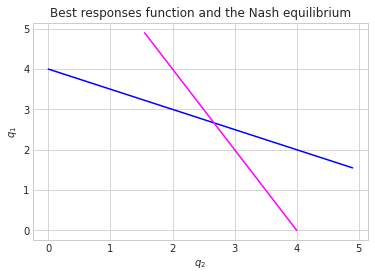

In [13]:
production_f2 = np.arange(0,5,0.1)
production_f1 = []

# b: creating figure 
for q2 in production_f2:
    q1 = round(bestresp_1(q2,8,1,0),3)
    production_f1.append(q1)

plt.title("Best responses function and the Nash equilibrium")
plt.ylabel("$q_1$")
plt.xlabel("$q_2$")
plt.plot(production_f2, production_f1, color='blue')
plt.plot(production_f1, production_f2, color='magenta')


This graph illustrate the best responds functions for the two firms. The intersection of the two lines illustrates the Nash equilibria we found in the numerical solution above (2,6666  2,6666).

In the following interactive graph, we want to see what happens if $b≠1$ so the goods are not perfect subtitutes.

In [14]:
# a: defining production levels 
q_1_interactive = np.arange(0,1,0.1)
q_2_interactive = np.arange(0,1,0.1)

# b: 
def f(substitution_rate):

    x = []
    y = []

    for q2 in q_2_interactive:
        q1 = round(bestresp_1(q2,10,substitution_rate,2),3)
        x.append(q1)

    for q1 in q_1_interactive:
        q2 = round(bestresp_2(q1,10,substitution_rate,2),3)
        y.append(q2)

    plt.title("Best response for firm 1 (pink) and best response for\nfirm 2 (blue) given produciton level of the other firm")
    plt.ylabel("$BR(q_i)$")
    plt.xlabel("$q_i$")
    plt.plot(q_2_interactive,x,color='blue')
    plt.plot(q_1_interactive,y,color='magenta')

widgets.interact(f,
    substitution_rate = widgets.FloatSlider(description="$b$",min=1,max=5),
 )

interactive(children=(FloatSlider(value=1.0, description='$b$', max=5.0, min=1.0), Output()), _dom_classes=('w…

<function __main__.f(substitution_rate)>

According to the analytical solution, the optimal quantity for firm 2, $q_2^*$, will be lower when b is higher. This is also what see in the graph. As b tends to infinity, $q_2^*$ tends to 0.

# Model extension: Cournot model with three firms

We will now extend our model by adding an additional firm

In [15]:
# Define the functions for the three-firms case
def p(q1,q2,q3,a):
    p = a - q1 - q2 - q3
    return p

def cost(q,c1):
    cost = q*c
    return cost

#profits for firm 1
def pi_1(q1,q2,q3,a,c):
    profits_1 = (p(q1,q2,q3,a)-c)*q1
    return profits_1

#profits for firm 2
def pi_2(q1,q2,q3,a,c):
    profits_2 = (p(q1,q2,q3,a)-c)*q2
    return profits_2

#profits for firm 3
def pi_3(q1,q2,q3,a,c):
    profits_3 = (p(q1,q2,q3,a)-c)*q3
    return profits_3

In [16]:
#Lowest value
q0 = [0]

#best responses 
def bestresp_1(q2,q3,a,c):
    q1_star_num = optimize.minimize(lambda q0: -pi_1(q0,q2,q3,a,c), q0).x[0]
    return q1_star_num

def bestresp_2(q1,q3,a,c):
    q2_star_num = optimize.minimize(lambda q0: -pi_2(q1,q0,q3,a,c), q0).x[0]
    return q2_star_num

def bestresp_3(q1,q2,a,c):
    q3_star_num = optimize.minimize(lambda q0: -pi_3(q1,q2,q0,a,c), q0).x[0]
    return q3_star_num

In [17]:
#defining nash equilibrium
def nash_eq_3f(q,param):
    x = q[0] - bestresp_1(q[1],q[2],param[0],param[1])
    y = q[1] - bestresp_2(q[0],q[2],param[0],param[1])
    z = q[2] - bestresp_3(q[0],q[1],param[0],param[1])
    return [x,y,z]

In [18]:
inital_values_3f = [1,1,1]
param = [10,2]

In [19]:
#solving for three firms
solver = optimize.fsolve(nash_eq_3f,inital_values_3f, args = (param))
print(f'The Nash Equilibrium is at: {solver}')

The Nash Equilibrium is at: [2. 2. 2.]


We see that in a cournot competition with three firms and parameters (a,c)=(2,10) each firm will produce 2 unties each. Furthermore, we see that when extending the model with an additional firm. The total output of the market increases.

# Conclusion

In this assingment we have solved the problem of af cournot competition with 2 and 3 firms. This could easily be extended to more firm if one wanted to do so. There are no new conclusions that we have never seen before.